# Week 4 Assignment

## Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

In [56]:
# Your answer to Graded Task 1 here:

import pandas as pd

# URL of the dataset
data_url = "https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv"

# Read the dataset into a Pandas DataFrame
df = pd.read_csv(data_url, header=0)
df.columns = df.columns.str.title()
df

,Storenum,Opendate,Date_Super,Conversion,St,County,Streetaddr,Strcity,Strstate,Zipcode,Type_Store,Lat,Lon,Month,Day,Year
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,5403,1/27/06,1/27/06,0.0,17,19,100 S High Cross Rd,Urbana,IL,61802,Supercenter,40.121648,-88.17649,1,27,2006
2988,3347,1/23/06,1/23/06,0.0,12,105,7450 Cypress Gardens Blvd,Winter Haven,FL,33884,Supercenter,27.997387,-81.68256,1,23,2006
2989,5485,1/27/06,NaN,NaN,17,31,2500 W 95th St,Evergreen Park,IL,60805,Wal-Mart,41.719933,-87.70249,1,27,2006
2990,3425,1/27/06,1/27/06,0.0,48,201,9598 Rowlett Rd,Houston,TX,77034,Supercenter,29.636430,-95.21789,1,27,2006


In [74]:
# Display the first few rows of the DataFrame to inspect the data
df.head()

,Storenum,Opendate,Date_Super,Conversion,St,County,Streetaddr,Strcity,Strstate,Zipcode,Type_Store,Lat,Lon,Month,Day,Year
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


In [75]:
# Check the data types and null values in the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2992 entries, 0 to 2991
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Storenum    2992 non-null   int64  
 1   Opendate    2992 non-null   object 
 2   Date_Super  1946 non-null   object 
 3   Conversion  1946 non-null   float64
 4   St          2992 non-null   int64  
 5   County      2992 non-null   int64  
 6   Streetaddr  2992 non-null   object 
 7   Strcity     2992 non-null   object 
 8   Strstate    2992 non-null   object 
 9   Zipcode     2992 non-null   int64  
 10  Type_Store  2992 non-null   object 
 11  Lat         2992 non-null   float64
 12  Lon         2992 non-null   float64
 13  Month       2992 non-null   int64  
 14  Day         2992 non-null   int64  
 15  Year        2992 non-null   int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 374.1+ KB


#### [GRADED  TASK 2]

- which state has the `7th highest` total number of Walmart super stores?
- which city has the `5th highest` total number of Walmart stores (super stores and regular stores combined)?

In [76]:
# Your answer to Graded Task 2 here:

# Filter the data to include only super stores
super_stores = df[df['Type_Store'] == 'Supercenter']

# Group the data by state and count the number of stores in each state
counts_by_state = super_stores.groupby('Strstate').size().reset_index(name='Count')

# Sort the data in descending order based on the count of stores
sorted_counts = counts_by_state.sort_values(by='Count', ascending=False)

# Select the 7th row of the data to get the state with the 7th highest total number of Walmart super stores
seventh_state = sorted_counts.iloc[6]['Strstate']

print("1. The state with the 7th highest total number of Walmart super stores is", seventh_state)


# Group the data by city and count the number of stores in each city
counts_by_city = df.groupby('Strcity').size().reset_index(name='Count')

# Sort the data in descending order based on the count of stores
sorted_counts = counts_by_city.sort_values(by='Count', ascending=False)

# Select the 5th row of the data to get the city with the 5th highest total number of Walmart stores
fifth_city = sorted_counts.iloc[4]['Strcity']

print("2. The city with the 5th highest total number of Walmart stores is", fifth_city)



1. The state with the 7th highest total number of Walmart super stores is AL
2. The city with the 5th highest total number of Walmart stores is San Antonio


#### [GRADED  TASK 3]
Write a function that takes as arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `cumsum` that contains the `cumulative` (i.e. `running`) sum of the number of stores over time opened in that state


In [77]:
# Your answer to Graded Task 3 here:

def cumulative_sum_by_state(df, state):
    try:
        # create a copy of the dataframe filtered by the state abbreviation
        df_state = df[df['Strstate'] == state].copy()
        
        # convert the Opendate column to datetime format and extract date component
        df_state.loc[:, 'Opendate'] = pd.to_datetime(df_state['Opendate'], format='%m/%d/%y').dt.date
        
        # group by date and count the number of stores opened on each date
        df_state = df_state.groupby(['Opendate']).agg({'Storenum': 'count'})
        
        # calculate cumulative sum of stores over time
        df_state = df_state.cumsum()
        
        # reset the index and rename columns to match output format
        df_state.reset_index(inplace=True)
        df_state.columns = ['date', 'cumsum']
        
        # return the resulting dataframe
        return df_state
    
    # handle possible exceptions
    except KeyError:
        print("Invalid state abbreviation. Please provide a valid two-letter state code.")
    except TypeError:
        print("Invalid input data. Please provide a pandas dataframe.")
    except Exception as e:
        print(f"An error occurred: {e}. Please check your input data and try again.") 
cumulative_sum_by_state(df, 'TX')        

,date,cumsum
0,1975-11-01,1
1,1976-03-01,2
2,1976-05-01,3
3,1976-06-01,4
4,1976-07-01,5
...,...,...
195,2005-08-24,307
196,2005-10-26,311
197,2005-11-02,312
198,2006-01-25,313


#### [GRADED  TASK 4]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the time series of cumulative store count over time in the state of Idaho (ID).

In [78]:
# Your answer to Graded Task 4 here:
from bokeh.plotting import figure, show  # import bokeh's plotting functions and the show function
from bokeh.models import ColumnDataSource, HoverTool  # import ColumnDataSource for mapping data to visual elements and HoverTool for adding hover tooltips
 
# call the cumulative_sum_by_state function again to get the cumulative store count over time for the state of Idaho
df_idaho = cumulative_sum_by_state(df, 'ID')  
# create a ColumnDataSource from the cumulative store count over time data for the state of Idaho
source = ColumnDataSource(df_idaho)  
# create a HoverTool with tooltips showing the date and cumulative store count at that date
hover = HoverTool(tooltips=[('Date', '@date{%F}'), ('Cumulative Store Count', '@cumsum')], formatters={'@date': 'datetime'})
# create a figure object with a title, x-axis label, y-axis label, and x-axis type set to datetime
p = figure(title="Cumulative Store Count Over Time in Idaho", x_axis_label="Date", y_axis_label="Cumulative Store Count", x_axis_type='datetime', tools=[hover])
# add a line to the figure object representing the cumulative store count over time data for the state of Idaho, using the ColumnDataSource created earlier
p.line(x='date', y='cumsum', source=source, line_width=2)
# show the figure object
show(p)

#### [GRADED  TASK 5]
Using any of the three plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot a bar chart that shows the `total` number of Walmart stores in each of the states that directly border the state of Utah (Arkansas (AR)).

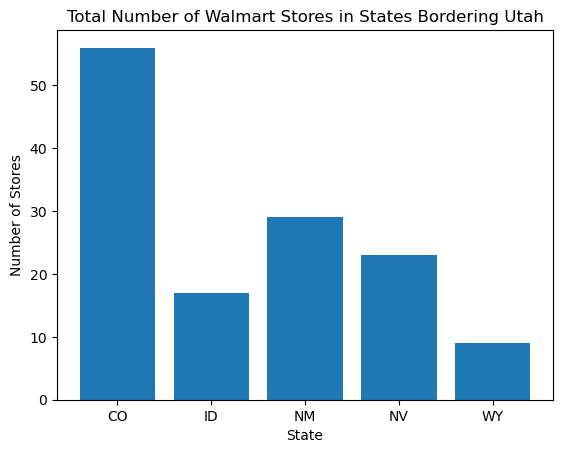

In [79]:
# Your asnwer to Graded Task 5 here:
import matplotlib.pyplot as plt

# Select the states that border Utah
border_states = ['CO', 'NM', 'NV', 'ID', 'WY']

# Create a new dataframe with only the stores in the border states
df_border = df[df['Strstate'].isin(border_states)].copy()

# Group the dataframe by state and count the number of stores
df_state_counts = df_border.groupby('Strstate').agg({'Storenum': 'count'})

# Create a bar chart
plt.bar(df_state_counts.index, df_state_counts['Storenum'])

# Set the title and axis labels
plt.title('Total Number of Walmart Stores in States Bordering Utah')
plt.xlabel('State')
plt.ylabel('Number of Stores')

# Show the plot
plt.show()